# Grafici sui dati sul Corona Virus

Qui ci andrebbe una introduzione degna di questo nome xxx xxx xxxx

Importiamo le librerie necessarie a fare statistiche e grafici

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Carichiamo i dati e vediamo un'anteprima

In [2]:
df = pd.read_csv('./../publication/provinceArchivioISTAT.csv')
# in alternativa URL diretta:
# https://raw.githubusercontent.com/ondata/covid19italia/master/publication/provinceArchivio.csv

df.sample(5)

,provincia,numero,regione,datetime,codiceISTAT
8,Napoli,17.0,CAMPANIA,2020-03-05,263.0
268,Lodi,384.0,LOMBARDIA,2020-03-02,98.0
89,Abruzzo da verificare,2.0,ABRUZZO,2020-03-04,NaN
239,TREVISO,82.0,VENETO,2020-03-03,26.0
287,Sicilia da aggiornare,3.0,SICILIA,2020-03-02,NaN


I dati del repo sono continuamente aggiornati, vediamo su quali luoghi e in che arco di tempo sono le osservazioni

In [31]:
for c in ['provincia', 'regione', 'datetime'] : 
    print(f'\n\n --- {c} ---')
    print(df[c].value_counts())



 --- provincia ---
in fase di verifica e aggiornamento    12
Catania                                 4
Massa Carrara                           4
Varese                                  4
Teramo                                  4
                                       ..
Lazio in fase di verifica               1
Grosseto                                1
Umbria da verificare                    1
BIELLA                                  1
Catanzaro                               1
Name: provincia, Length: 88, dtype: int64


 --- regione ---
LOMBARDIA                52
EMILIA-ROMAGNA           38
VENETO                   31
TOSCANA                  31
PIEMONTE                 26
LIGURIA                  19
PUGLIA                   16
ABRUZZO                  13
SICILIA                  12
MARCHE                   10
FRIULI VENEZIA GIULIA    10
UMBRIA                    9
TRENTINO ALTO ADIGE       7
LAZIO                     7
CAMPANIA                  6
CALABRIA                  5
MOLISE  

Qualche statistica descrittiva sul numero dei contagiati

In [32]:
totale_contagiati = df['numero'].sum()
print(f'Totale contagiati {totale_contagiati}')

Totale contagiati 11429.0


## I contagiati per regione, provincia, data

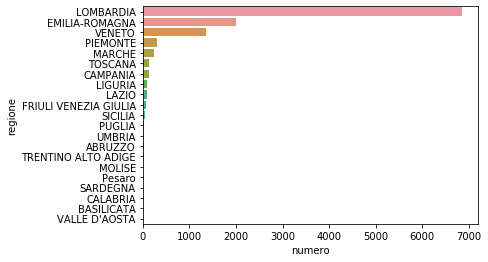

                       numero
regione                      
LOMBARDIA              6845.0
EMILIA-ROMAGNA         1997.0
VENETO                 1347.0
PIEMONTE                297.0
MARCHE                  243.0
TOSCANA                 131.0
CAMPANIA                123.0
LIGURIA                 100.0
LAZIO                    95.0
FRIULI VENEZIA GIULIA    61.0
SICILIA                  50.0
PUGLIA                   32.0
UMBRIA                   28.0
ABRUZZO                  26.0
TRENTINO ALTO ADIGE      20.0
MOLISE                   13.0
Pesaro                    6.0
SARDEGNA                  5.0
CALABRIA                  5.0
BASILICATA                3.0
VALLE D'AOSTA             2.0


In [33]:
df_by_regione = df[ ['regione', 'numero'] ].groupby('regione')
df_by_regione = df_by_regione.sum().sort_values(by='numero', ascending=False)

sns.barplot(data=df_by_regione.reset_index(), x='numero', y='regione')
plt.show()

print(df_grouped_by_regione)

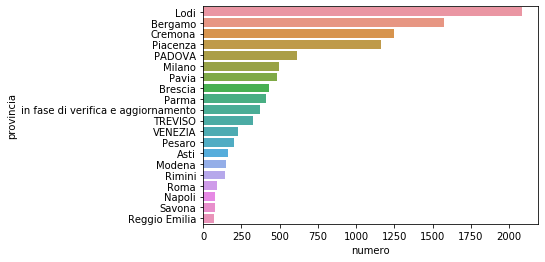

                                     numero
provincia                                  
Lodi                                 2083.0
Bergamo                              1575.0
Cremona                              1249.0
Piacenza                             1165.0
PADOVA                                616.0
Milano                                493.0
Pavia                                 482.0
Brescia                               428.0
Parma                                 410.0
in fase di verifica e aggiornamento   369.0
TREVISO                               329.0
VENEZIA                               228.0
Pesaro                                205.0
Asti                                  161.0
Modena                                148.0
Rimini                                144.0
Roma                                   92.0
Napoli                                 81.0
Savona                                 75.0
Reggio Emilia                          73.0


In [34]:
df_by_provincia = df[ ['provincia', 'numero'] ].groupby('provincia')
df_by_provincia = df_by_provincia.sum().sort_values(by='numero', ascending=False)

# prendiamo in considerazione solo le prime 20 più colpite
df_by_provincia = df_by_provincia.head(20)

sns.barplot(data=df_by_provincia.reset_index(), x='numero', y='provincia')
plt.show()

print(df_by_provincia)

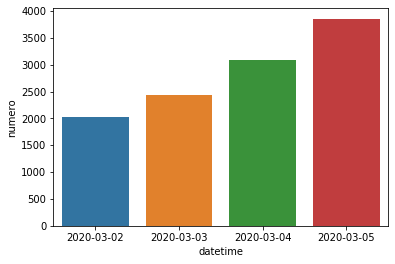

            numero
datetime          
2020-03-02  2036.0
2020-03-03  2446.0
2020-03-04  3089.0
2020-03-05  3858.0


In [41]:
df_by_datetime = df[ ['datetime', 'numero'] ].groupby('datetime')
df_by_datetime = df_by_datetime.sum().sort_values(by='datetime')

sns.barplot(data=df_by_datetime.reset_index(), x='datetime', y='numero')
plt.show()

print(df_by_datetime)